## Contrast and Duration Comparisons

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import scipy

In [3]:
# load files
serverPath = Path(r'Z:\Subjects\AL_0023\2023-05-15\1')

timeFile = serverPath / 'cameraFrameTimes.npy'
frameTimes = np.squeeze(np.load(timeFile))[::2] # every other frame - we want blue only
svdTemp = np.load(serverPath / 'corr/50_svdTemporalComponents_corr.npy')
svdSpat = np.load(serverPath / 'blue/50_svdSpatialComponents.npy')
meanImage = np.load(serverPath / 'blue/meanImage.npy')
stimOnTimes = np.squeeze(np.load(r'Z:\Subjects\AL_0023\2023-05-15\3\linTestOnTimes.npy'))
stimContrasts = np.squeeze(np.load(r'Z:\Subjects\AL_0023\2023-05-15\3\linTestContrasts.npy'))
stimDurations = np.squeeze(np.load(r'Z:\Subjects\AL_0023\2023-05-15\3\linTestDurations.npy'))

In [4]:
# creating arrays tht correspond to the max and min stim contrasts over time
uniqueContrasts = np.unique(stimContrasts)
maxUnique = max(uniqueContrasts)
minUnique = min(uniqueContrasts)
maxContrasts = np.where(np.array(stimContrasts) == (maxUnique))[0]
minContrasts = np.where(np.array(stimContrasts) == (minUnique))[0]
stimOnMax = stimOnTimes[maxContrasts]
stimOnMin = stimOnTimes[minContrasts]

In [5]:
# interp function: get svdTemp at any time
getTempComp = scipy.interpolate.interp1d(frameTimes, svdTemp, axis=0)

In [6]:
trial_time_max = [np.linspace(i-0.1, i+0.6, 100) for i in stimOnMax]
trial_time_max = np.array(trial_time_max)

trial_time_min = [np.linspace(i-0.1, i+0.6, 100) for i in stimOnMin]
trial_time_min = np.array(trial_time_min)

In [7]:
#interpolation
trial_activity_max = getTempComp(trial_time_max)
trial_activity_min = getTempComp(trial_time_min)


In [8]:
trial_activity_max_reshaped = np.mean(trial_activity_max, axis=0)
spatial = svdSpat.reshape(560*560, -1)
videoMax = spatial @ trial_activity_max_reshaped.T
videoMax = videoMax.reshape(560, 560, -1)

trial_activity_min_reshaped = np.mean(trial_activity_min, axis=0)
spatial = svdSpat.reshape(560*560, -1)
videoMin = spatial @ trial_activity_min_reshaped.T
videoMin = videoMin.reshape(560, 560, -1)

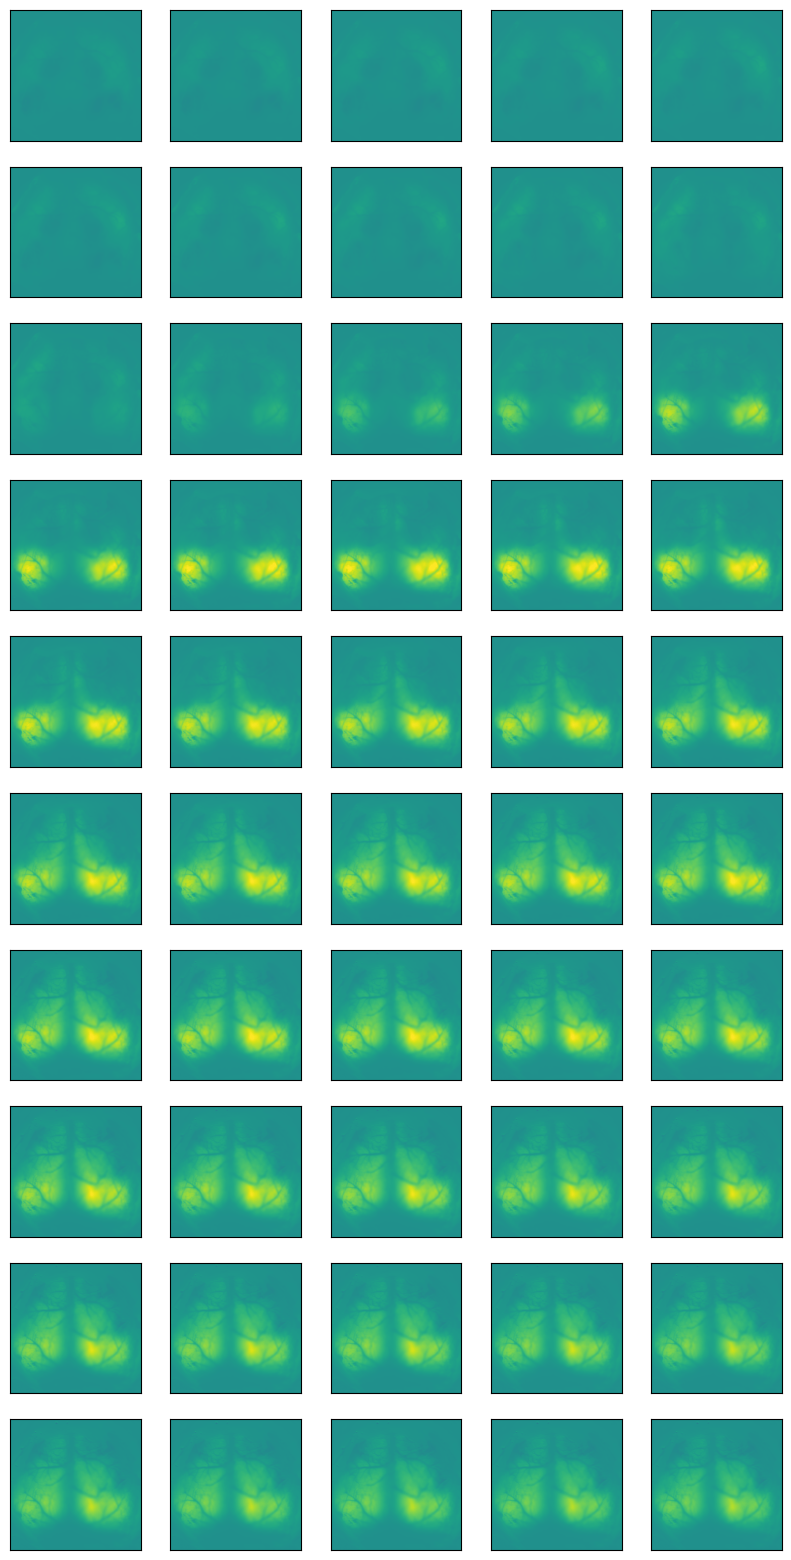

In [18]:
#testing that I made the video of the max contrast/time correctly
n_cols = 5
n_rows = 10
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(50):
    ax = plt.subplot(gs[i])
    plt.imshow(videoMax[:, :, i*2], clim=[-3000, 3000])
    plt.xticks([])
    plt.yticks([])
    #plt.title(f't = {trial_time_all[i*2]}s')
    # plt.colorbar()

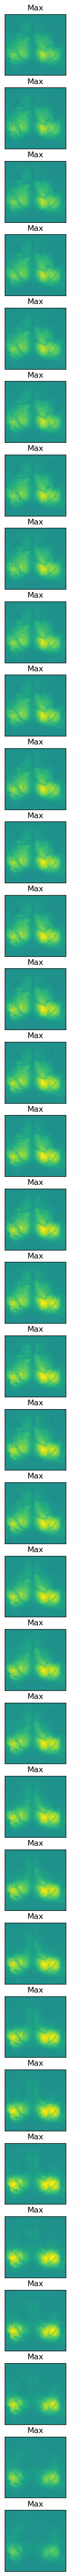

In [19]:
videoMaxAvg = np.mean(videoMax, axis = (0,1))
locationMax = np.argmax(videoMaxAvg) 

videoMinAvg = np.mean(videoMin, axis = (0,1))
locationMin = np.argmax(videoMinAvg)

n_cols = 2
n_rows = 50
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(0,70,2):
    ax = plt.subplot(gs[i])
    plt.imshow(videoMax[:, :, (locationMax - (i-35))], clim=[-3000, 3000])
    plt.xticks([])
    plt.yticks([])
    ax.set_title("Max")
           

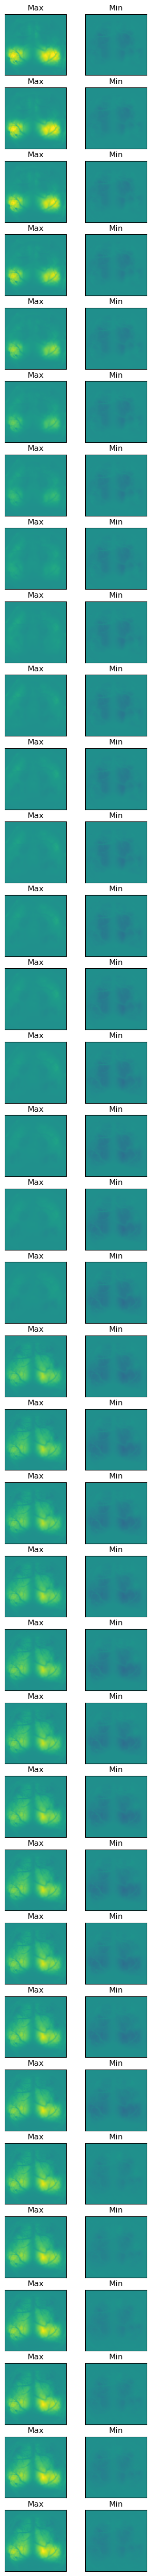

In [20]:
#looking at min values

videoMaxAvg = np.mean(videoMax, axis = (0,1))
locationMax = np.argmin(videoMaxAvg) 

videoMinAvg = np.mean(videoMin, axis = (0,1))
locationMin = np.argmin(videoMinAvg)

n_cols = 2
n_rows = 50
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(0,70,2):
    ax = plt.subplot(gs[i])
    plt.imshow(videoMax[:, :, (locationMax - (i-35))], clim=[-3000, 3000])
    plt.xticks([])
    plt.yticks([])
    ax.set_title("Max")
           
    ax = plt.subplot(gs[i+1])
    plt.imshow(videoMin[:,:, (locationMin - (i-35))], clim=[-3000,3000])
    plt.xticks([])
    plt.yticks([])
    ax.set_title("Min")          

Text(0.5, 1.0, 'Max')

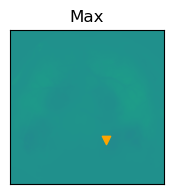

In [23]:
# lets plot a pixel over time 
n_cols = 1
n_rows = 1
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
ax = plt.subplot(gs[0])
plt.imshow(videoMax[:, :, (locationMax)], clim=[-3000, 3000])
plt.scatter([350],[400], c="orange", marker="v")
plt.xticks([])
plt.yticks([])
ax.set_title("Max")

Text(0.5, 1.0, 'Differing Contrasts Cause Changes in Activity')

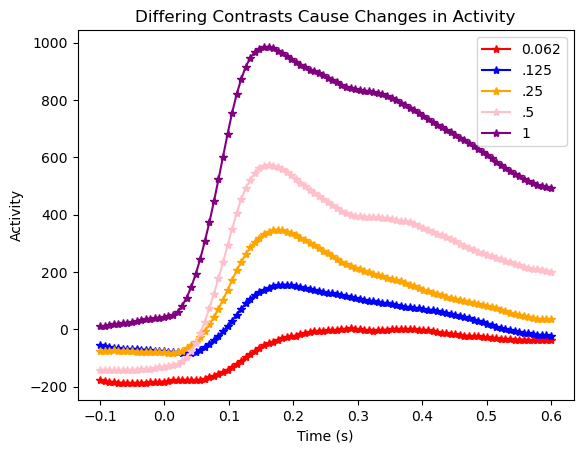

In [10]:
#plotting pixel 350, 400 over time 
locContrasts = np.unique(stimContrasts)

videos = []
spatial = svdSpat.reshape(560*560, -1)
timeScale = np.linspace(-0.1, 0.6, 100)
for contrast in locContrasts:
    theseIndexes = np.squeeze(np.argwhere(stimContrasts == contrast))

    stim = stimOnTimes[theseIndexes]
    trial_time = [np.linspace(i-0.1, i+0.6, 100) for i in stim]

    trial_activity = getTempComp(trial_time)

    reshape = np.mean(trial_activity, axis=0)
    video = spatial @ reshape.T
    video = video.reshape(560, 560, -1)
    videos.append(video)
    
videos = np.array(videos)

colors = ['red', 'blue', 'orange', 'pink', 'purple']
for j in range(0,5):
    plt.plot(timeScale, videos[j,460,400], marker='*', c=colors[j])
plt.legend(["0.062", ".125", '.25', '.5', '1'])
plt.xlabel("Time (s)")
plt.ylabel("Activity")
plt.title("Differing Contrasts Cause Changes in Activity")

Text(0.5, 1.0, 'Activity for Contrasts, Max Duration')

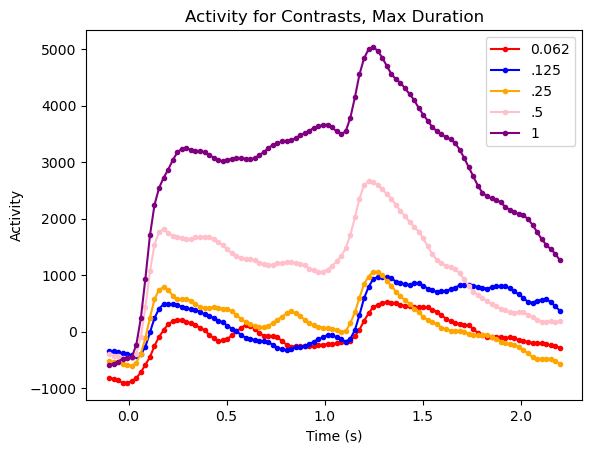

In [11]:
#playing with durations: one plot for max duration, with all contrasts plotted

locContrasts = np.unique(stimContrasts)
locDurations = np.unique(stimDurations)
maxDuration = max(locDurations)
theseIndexesDur = np.squeeze(np.argwhere(stimDurations == maxDuration))
    
videos = []
spatial = svdSpat.reshape(560*560, -1)
timeScale = np.linspace(-0.1, 2.2, 100)

for contrast in locContrasts:
    theseIndexesCon = np.squeeze(np.argwhere(stimContrasts == contrast))
    
    indexes = np.intersect1d(theseIndexesCon, theseIndexesDur)
    stim = stimOnTimes[indexes]
    trial_time = [np.linspace(i-0.1, i+2.2, 100) for i in stim]

    trial_activity = getTempComp(trial_time)

    reshape = np.mean(trial_activity, axis=0)
    video = spatial @ reshape.T
    video = video.reshape(560, 560, -1)
    videos.append(video)
    
videos = np.array(videos)

colors = ['red', 'blue', 'orange', 'pink', 'purple']
for j in range(0,5):
    plt.plot(timeScale, videos[j,350,400], marker='.', c=colors[j])
plt.legend(["0.062", ".125", '.25', '.5', '1'])
plt.xlabel("Time (s)")
plt.ylabel("Activity")
plt.title("Activity for Contrasts, Max Duration")

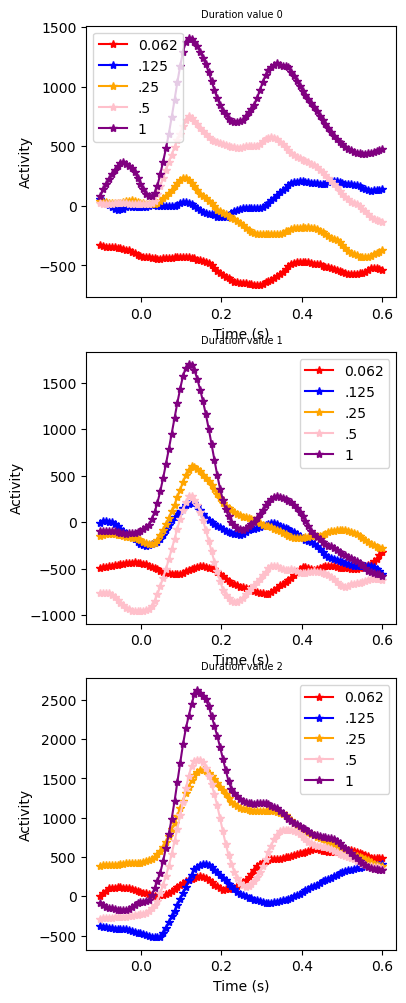

In [13]:
# 3 different plots, each for a diff duration, all with all contrasts

locContrasts = np.unique(stimContrasts)
locDurations = np.unique(stimDurations)

videos = [[] for x in range(3)]
spatial = svdSpat.reshape(560*560, -1)
timeScale = np.linspace(-0.1, 0.6, 100)
for count,duration in enumerate(locDurations[:3]):
    theseIndexesDur = np.squeeze(np.argwhere(stimDurations == duration))
    for contrast in locContrasts:
        theseIndexesCon = np.squeeze(np.argwhere(stimContrasts == contrast))
        indexes = np.intersect1d(theseIndexesCon, theseIndexesDur)
        stim = stimOnTimes[indexes]
        trial_time = [np.linspace(i-0.1, i+0.6, 100) for i in stim]

        trial_activity = getTempComp(trial_time)

        reshape = np.mean(trial_activity, axis=0)
        video = spatial @ reshape.T
        video = video.reshape(560, 560, -1)
        
        videos[count].append(video)

videos = np.array(videos)

colors = ['red', 'blue', 'orange', 'pink', 'purple']
n_cols = 1
n_rows = 3
f = plt.figure(figsize=(n_cols*4, n_rows*4))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(3):
    ax = plt.subplot(gs[i])
    for j in range(0,5):
        plt.plot(timeScale, videos[i,j,350,400], marker='*', c=colors[j])
    plt.legend(["0.062", ".125", '.25', '.5', '1'])
    plt.xlabel("Time (s)")
    plt.ylabel("Activity")
    plt.title("Duration value " + str(i), fontsize = 7)

100
100
100
100
100


Text(0.5, 1.0, 'Activity for Contrasts, Max Duration')

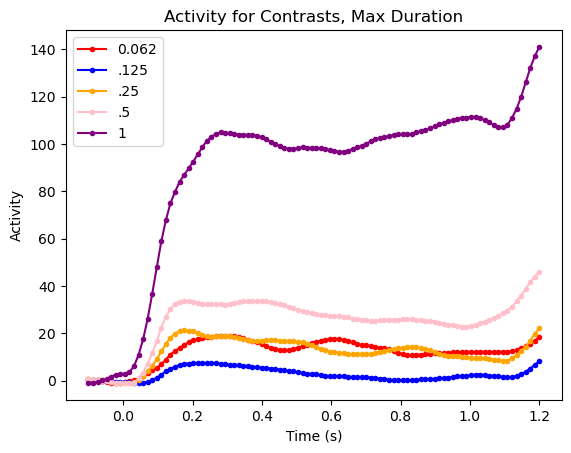

In [26]:
# correction - df/f - with all contrasts, max duration

locContrasts = np.unique(stimContrasts)
locDurations = np.unique(stimDurations)
maxDuration = max(locDurations)
theseIndexesDur = np.squeeze(np.argwhere(stimDurations == maxDuration))
    
videos = []
spatial = svdSpat.reshape(560*560, -1)
timeScale = np.linspace(-0.1, 1.2, 100)

for contrast in locContrasts:
    theseIndexesCon = np.squeeze(np.argwhere(stimContrasts == contrast))
    
    indexes = np.intersect1d(theseIndexesCon, theseIndexesDur)
    stim = stimOnTimes[indexes]
    
    trial_time = [np.linspace(i-0.1, i+1.2, 100) for i in stim]
    trial_activity = getTempComp(trial_time)

    reshape = np.mean(trial_activity, axis=0)
    video = spatial @ reshape.T
    video = video.reshape(560, 560, -1)
    videos.append(video)
    
videos = np.array(videos)

colors = ['red', 'blue', 'orange', 'pink', 'purple']
for j in range(0,5):
    frame_raw = videos[j,330:350,380:400, :]
    # print(frame_raw.shape)
    frame = np.mean(frame_raw, axis=(0, 1))
    # print(frame.shape)
    minActivity = min(frame)
    if minActivity < 0:
        #frame = [(x+minActivity*-1) for x in frame]
        frame += minActivity*-1
    f0 = np.mean(frame[:6])
    frame = [(x-f0)/(f0+1) for x in frame]
    print(len(frame))
    plt.plot(timeScale, frame, marker='.', c=colors[j])
plt.legend(["0.062", ".125", '.25', '.5', '1'])
plt.xlabel("Time (s)")
plt.ylabel("Activity")
plt.title("Activity for Contrasts, Max Duration")

In [27]:
# bar graphs. contrast v mean activity, under different durations 

# loop through durations
# for each durations, create arrays of contrast + mean activity 
# bar graph 

locDurations = np.unique(stimDurations)
locContrasts = np.unique(stimContrasts)
collectAverages = []
collectAveragesContrast = []
for duration in locDurations:
    theseIndexesDur = np.squeeze(np.argwhere(stimDurations == duration))
    for contrast in locContrasts: #for each contrast
        contrastIndeces = [j for j,value in enumerate(stimContrasts) if (value==contrast)] #find indeces where specfic contrast was used
        indexes = np.intersect1d(contrastIndeces, theseIndexesDur) #find indeces where its both the duration we want and the contrast we want
        stim = stimOnTimes[indexes] #make an array of only the indeces found above
        trial_time = [np.linspace(k-0.1, k+.6, 100) for k in stim]
        trial_activity = getTempComp(trial_time)
        
        #correct activity so its not negative 
        minActivity = np.min(trial_activity)
        if minActivity < 0:
            trial_activity += minActivity*-1
            
        averageForContrast = np.mean(trial_activity)
        collectAveragesContrast.append(averageForContrast)
    collectAverages.append(collectAveragesContrast)
    collectAveragesContrast = []
collectAverages = np.array(collectAverages)

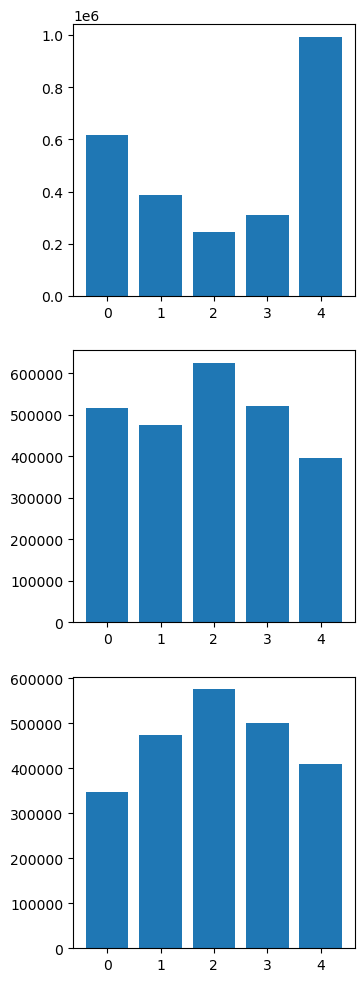

In [28]:
n_cols = 2
n_rows = 3
f = plt.figure(figsize=(n_cols*4, n_rows*4))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(3):
    ax = plt.subplot(gs[i,0])
    plt.bar(range(0,5), collectAverages[i,:], width = .8)

Text(0.5, 1.0, 'activity levels of contrast and duration')

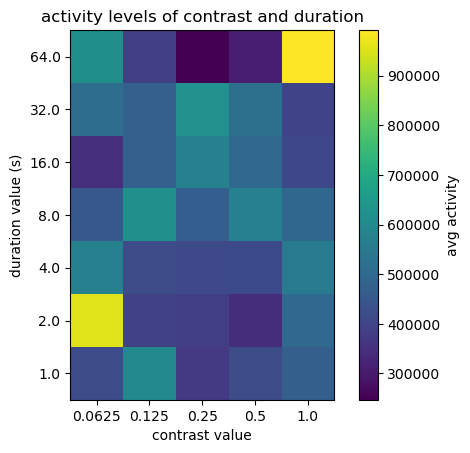

In [29]:
ax = plt.subplot(111)
im = ax.imshow(collectAverages, cmap='viridis')
color = plt.colorbar(im)
color.ax.set_ylabel("avg activity")
ax.set_xticks(np.arange(len(locContrasts)), labels=locContrasts)
ax.set_xlabel("contrast value")
ax.set_yticks(np.arange(len(locDurations)), labels=np.flip(locDurations))
ax.set_ylabel("duration value (s)")
ax.set_title("activity levels of contrast and duration")